In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [26]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [30]:
class LogisticReg():
    def __init__(self, epochs, lr):
        
        self.epochs = epochs
        self.lr = lr
        self.weights = None
        self.bias = None
        
        
    def sigmoid(self, X):
        return (1/(1+np.exp(-X)))
    
    
    
    def cross_entropy_loss(self, yhat, y):
        
        return -np.mean((y*np.log(yhat)-(1-y)*np.log(1-yhat)))
    
        
    def normalize(self, X):
        
        return ((X-X.mean(axis=0))/X.std(axis=0))
        
    def fit(self, X, Y):
        
        m, n = X.shape
        
        y = Y.reshape(m,1)
        
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        x = self.normalize(X)
        losses = []
        
        for _ in range(self.epochs):
            
            lc = np.dot(x, self.weights) + self.bias
            yhat = self.sigmoid(lc)
            loss = self.cross_entropy_loss(yhat, y)
            dw = (1/m)*np.dot(X.T, (yhat-y))
            db = (1/m)*np.sum((yhat-y))
            
            self.weights-=self.lr*dw
            self.bias -= self.lr * db
            
            
        return self.weights, self.bias
    
    
    def predict(test):
        
        prob = self.sigmoid(np.dot(test, self.weights)+self.bias)
        
        pred_class = []
    
        pred_class = [1 if i > 0.5 else 0 for i in prob]
    
        return np.array(pred_class)
            
            
            
            
            
            
        
        

In [31]:
def plot_decision_boundary(X, w, b):
    
    # X --> Inputs
    # w --> weights
    # b --> bias
    
    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlim([-2, 2])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

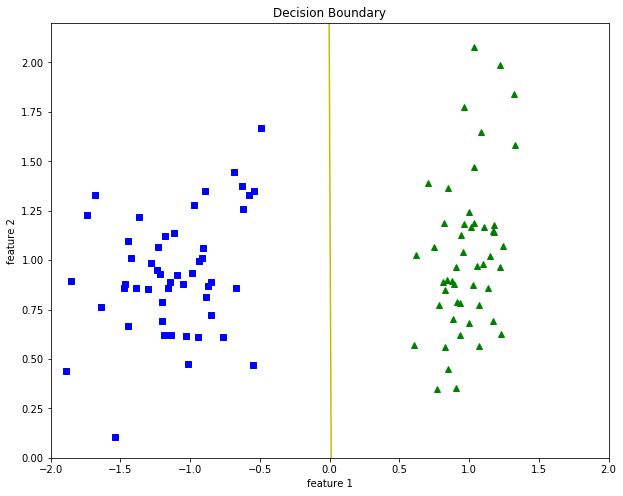

In [32]:
clf = LogisticReg(epochs=1000, lr=0.01)
w, b  = clf.fit(X, y)
# Plotting Decision Boundary
plot_decision_boundary(X, w, b)